In [7]:
from gbsio import read_from_csv
from partition import RelativePartitioner
from gbs import compute_kl_sri

## Read coordinates and values from CSV file.
coords, values = read_from_csv("data/example_data.csv", value_column="hit@1")

## Construct a partitioner that extract neighborhood points.
partitioner = RelativePartitioner(coords, values)

## The index of the center point to evaluate.
idx = 0
center = coords[idx]

## The radius of the neighborhood.
radius = 0.1
scale = 0.05

## Extract neighbood points.
local_coords_list, local_values_list, total_list = partitioner.get_scale_grid(idx, radius, scale)

In [2]:
center

array([ 0.84053838, -1.21585208])

In [3]:
from matplotlib import pyplot as plt

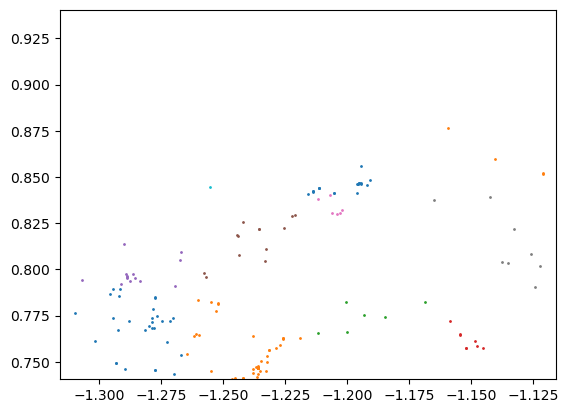

In [4]:
plt.xlim([center[1] - 0.1, center[1] + 0.1])
plt.ylim([center[0] - 0.1, center[0] + 0.1])

for local_coords in local_coords_list:
    plt.scatter(local_coords[:, 1], local_coords[:, 0], s=1)

In [8]:
sris, weights = compute_kl_sri(local_values_list, total_list)

print(sris, weights)

[array([ 0.05887676,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.05101394]), array([-0.0558173 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.07086297]), array([-0.05762378,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.07409124])] [0.18867924528301888, 0.3018867924528302, 0.1320754716981132]


In [9]:
len(sris)

3